<h1>Trabalho 2 - Regressão Linear com Múltiplas Features</h1>

Nesta tarefa, implementaremos um algoritmo de regressão linear capaz de lidar com datasets de múltiplas features. Utilizaremos o método do gradiente descendente para encontrar os pesos w e b do nosso modelo.

Para avaliar nosso modelo, utilizaremos curvas de aprendizado e métricas de avaliações tradicionais para regressão.

Para completar esta tarefa, você deve implementar o seguinte:
- Uma função de gradiente, para calcular o valor da derivada da função de custo para os parâmetros w e b.
- Uma função para o método de gradiente descendente de múltiplas features.
- Uma função de custo <b>J</b>, que será utilizada para calcular a diferença do erro quadrado.
- Uma função que separa nosso dataset em dois conjuntos, um de treinamento e outro para validação.
- Gerar visualizações de curvas de aprendizado.

O dataset que utilizaremos está disponível no moodle. É novamente um dataset de casas, porém agora considerando outras características de uma casa para considerar seu valor.

Trabalharemos basicamente com arrays numpy, porém utilizaremos a biblioteca pandas pela conveniência de informações e facilidade de carregar o dataset disponibilizado em um arquivo CSV.
Também utilizaremos o módulo pyplot da biblioteca matplotlib, para plotar os gráficos que utilizaremos para avaliar o modelo.

<h2>Importando biliotecas, carregando e preparando dataset</h2>

Importando as bibliotecas.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

O primeiro passo é importar nosso dataset em um dataframe pandas. 

Note que se o dataset não estivar na mesma pasta em que este Notebook você precisará alterar o caminho para o arquivo.

In [120]:
dataset = pd.read_csv("casas.csv")

O dataset que vamos utilizar contém exemplos de casas e para casa temos sua idade (em anos), a distância para escola mais próxima (em kilômetros), o número de lojas de conveniência em um raio de 1 km e o valor da casa (em milhares de reais).

Neste trabalho, o objetivo é treinar um modelo capaz de predizer o <b>preço</b> da casa com base em sua idade, distância para escola e número de lojas de conveniência próximas a ela.

Inicialmente, vamos analisar os 10 primeiros exemplos do nosso dataset.

In [121]:
dataset.head(10)

,IdadeCasa-Anos,DistanciaEscola-Kilometros,Num_Lojas_Conveniencia,Preco-MilReais
0,32.0,0.084,10,37.9
1,19.5,0.306,9,42.2
2,13.3,0.561,5,47.3
3,13.3,0.561,5,54.8
4,5.0,0.390,5,43.1
5,7.1,2.175,3,32.1
6,34.5,0.623,7,40.3
7,20.3,0.287,6,46.7
8,31.7,5.512,1,18.8
9,17.9,1.783,3,22.1


A biblioteca pandas possui a função <b>describe()</b>, que compila diversas medidas estatísticas de cada feature do nosso dataset de forma automática.
- count: quantidade de exemplos no dataset
- mean: média aritmética
- std: desvio padrão
- min: menor valor da feature no dataset
- 25% / 50% / 75%: percentis para cada feature (valor que divide o dataset nessa proporção, para 50% é o mesmo que a mediana)
- max: maior valor da feature no dataset

In [122]:
dataset.describe()

,IdadeCasa-Anos,DistanciaEscola-Kilometros,Num_Lojas_Conveniencia,Preco-MilReais
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1.083377,4.094203,37.980193
std,11.392485,1.262159,2.945562,13.606488
min,0.000000,0.023000,0.000000,7.600000
25%,9.025000,0.289000,1.000000,27.700000
50%,16.100000,0.492000,4.000000,38.450000
75%,28.150000,1.453500,6.000000,46.600000
max,43.800000,6.488000,10.000000,117.500000


Para implementação, iremos trabalhar apenas com arrays da bilioteca numpy, por isso converteremos o dataframe pandas em dois arrays numpy. O primeiro contendo nossos exemplos e o segundo contendo os nossos valores objetivos.


In [123]:
nparray = dataset.to_numpy()
X = nparray[:,:3]
Y = nparray[:,3]

Abaixo podemos verificar as dimensões e tipo dos nossos dados.

In [124]:
X.shape

(414, 3)

In [125]:
X

array([[32.   ,  0.084, 10.   ],
       [19.5  ,  0.306,  9.   ],
       [13.3  ,  0.561,  5.   ],
       ...,
       [18.8  ,  0.39 ,  7.   ],
       [ 8.1  ,  0.104,  5.   ],
       [ 6.5  ,  0.09 ,  9.   ]])

In [126]:
Y.shape

(414,)

In [127]:
Y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

<h2>Desenvolvendo gradiente descendente</h2>

Antes de poder treinar um modelo com o nosso dataset, precisamos desenvolver a função de custo, função de cálculo de gradiente e a função para executar o método do gradiente descendente.

<h3>Função de custo</h3>

A primeira função a ser desenvolvida é a função $J(\vec{w},b)$ para computar o custo do erro do modelo no dataset.

Para calcular o erro utilizaremos a função do erro quadrático médio (Mean Squared Error - MSE).

A MSE é dada pela seguinte equação:

$$
    (\hat{y} - y)^2
$$

Onde $\hat{y}$ é o valor predito e $y$ é o valor alvo.

O custo de erro total (custo sobre o dataset inteiro) é dado pela seguinte equação:

$$
1/2m\sum_{i=0}^{m-1} ((\hat{y}^{(i)} - y^{(i)})^2)
$$

Como estamos agora trabalhando com múltiplas features, nossa função agora é a seguinte:
$$
\hat{y}^{(i)} = f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w}\cdot \vec{x}^{(i)}+b
$$

Onde $\vec{w}$ é um vetor com parâmetros $w_0$...$w_n$ e $\vec{x}^{(i)}$ são os valores das features ${x_0}^{(i)}...{x_n}^{(i)}$ para o i-ésimo exemplo do dataset.

<b><i>ATENÇÃO!!!!!!!</i></b> $x^{(i)}$ não significa $x$ <b>elevado</b> ao número $i$, mas sim o i-ésimo exemplo do nosso dataset!

Lembrando que o que estamos calculando entre $\vec{w}$ e $\vec{x_{i}}$ é o produto escalar (dot product) entre os dois vetores, representado por $\vec{w}\cdot \vec{x_{i}}$

O produto escalar entre um vetor $w$ e um vetor $x$ é calculado com a seguinte fórmula:
$$
\sum_{j=0}^{n-1}w_j \times x_j
$$
Que é equivalente a:
$$
w_0 \times x_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n
$$

<b>Dica:</b> Podemos utilizar a função <b>numpy.dot(w,x)</b> para calcular isto de forma vetorizada (em paralelo) e acelerar - e muito - nossos cálculos.

In [128]:
def funcao_custo(X,Y,W,b):
    """
    Parâmetros:
    X (ndarray (m,n)) : Dataset, m exemplos com n features
    Y (ndarray (m,))  : valores objetivo para cada exemplo do dataset
    W (ndarray (n,))  : parâmetros w do modelo
    b (escalar)       : parâmetro b do modelo
    
    Retorno:
    custo_total (escalar): custo total dos parâmetros w e b no dataset X
    """
    custo_total = 0
    m,n = X.shape #m = total de exemplos, n = total de features

    #código inicia aqui

    # X(i) =conjunto de dados na posicao i do dataset x

    # esc = np.dot(X, W) + b   
        
    for i in range(m):
        esc = np.dot(X[i], W)
        yPred = esc + b
        custo_total += (yPred - Y[i])**2

    custo_total = (1/2 *m)*custo_total

    #código termina aqui
    return custo_total

<h3>Calculando gradiente</h3>

A função gradiente calcula o valor das derivadas da função de custo $J(\vec{w},b)$ em relação aos parâmetros $\vec{w}$ e $b$.

Quando temos múltiplos parâmetros precisamos calcular individualmente a derivada de cada parâmetro e armazenar todos esses valores em um vetor (o vetor gradiente!)

A derivada da função de custo em relação a um parâmetro $w_j$ é: 

$$
1/m\sum_{i=0}^{m-1} (\hat{y_{i}} - y_{i})\times {x_j}^{(i)}
$$

A derivada da função de custo em relação a **b** é:

$$
1/m\sum_{i=1}^m (\hat{y_{i}} - y_{i})
$$


In [129]:
def gradiente(X,Y,W,b):
    """
    Função para computar o gradiente com parâmetros específicos w e b
    Parâmetros:
    X (ndarray (m,n)): Dataset, m exemplos com n features
    Y (ndarray (m,)) : valores objetivo
    W (ndarray (n,)) : vetor de parâmetros w do modelo
    b (escalar)      : parâmetro b do modelo

    Retorno:
    derivada_w (ndarray (n,)): valor da derivada da função de custo em relação a cada parâmetro wj
    derivada_b (escalar):      valor da derivada da função de custo em relação a b
    """

    m,n = X.shape #m = total de exemplos, n = total de features
    derivadas_w = np.zeros(n) #array de tamanho n inicializado com zeros
    derivada_b = 0

    #código inicia aqui
        
    for i in range(m):
        esc = np.dot(X[i], W)
        yPred = esc + b
        derivadas_w += (yPred - Y[i]) * X[i]
        derivada_b += (yPred - Y[i])
            #não esqueça de utilizar a função np.dot() para cálculo do produto escalar!
    
    #código termina aqui

    return derivadas_w, derivada_b

<h3>Método do gradiente descendente</h3>

O método **gradiente_descendente** minimiza o custo para os parâmetros $\vec{w}$ e $b$.

O gradiente descendente funciona como abaixo.

Repetir até convergir:

{
$$w_0 = w_0 - \alpha * \frac{\partial J}{\partial w_0}$$
$$w_0 = w_1 - \alpha * \frac{\partial J}{\partial w_1}$$
$$.$$
$$.$$
$$.$$
$$w_0 = w_j - \alpha * \frac{\partial J}{\partial w_j}$$
$$b = b - \alpha * derivada_b$$
}

Lembrando que $\vec{w}$ e $b$ precisam ser atualizados simultaneamente. Ou seja, suas derivadas precisam ser **todas** calculadas antes de atuliazar qualquer um deles.

**Convergir** significa que nenhum dos parâmetro é atualizado após uma iteração do método, o que significa que já encontramos um mínimo global. Na prática, isto pode demorar muito, por isso temos um novo parâmetro, chamado de ***épocas***, que define um número máximo de iterações para o método, para evitar que fique tentando convergir infinitamente.



In [130]:
def gradiente_descendente(X,Y,W_inicial,b_inicial,learning_rate,epocas):
    """
    Função para encontrar os parâmetros w e b que minimizam o custo de erro do nosso modelo
    
    Parâmetros:
    X (ndarray (m,n))        : Dataset, m exemplos com n features
    Y (ndarray (m,))         : valores objetivo
    W_inicial (ndarray (n,))      : vetor de parâmetros w para começar o método
    b_inicial (escalar)      : parâmetro b inicial para começar o método
    learning_rate (escalar)  : taxa de aprendizado do nosso algoritmo (geralmente menor que 0.01)
    epocas(escalar)          : numero máximo de iterações para o método do gradiente descente
    
    Retorno:
    W (ndarray (n,))         : vetor com melhores valores encontrados para os parâmetros w
    b (escalar)              : melhor valor encontrado para b
    histórico_J (list)       : uma lista contendo os valores da função de custo ao longo das épocas
    """
    
    m,n = X.shape #m = total de exemplos, n total de features

    W = W_inicial
    b = b_inicial

    historico_J = []    #pode ser interessante calcular o custo a cada X épocas, ao invés de calcular em toda época, por questões de performance
    
    #código inicia aqui

    for i in range(epocas):

        derivadas_w, derivada_b = gradiente(X,Y,W,b)
        
        W -= learning_rate * derivadas_w
        b -= learning_rate * derivada_b
        historico_J.append(funcao_custo(X,Y,W,b))
    
    #código encerra aqui

    return W,b,historico_J

<h2>Treinando e avaliando nosso modelo</h2>

Quando treinamos um modelo, idealmente desejamos que ele tenha boa performance em dados que ele não utilizou durante o treinamento.
Como dados não caem do céu, em geral o que fazemos é dividir nosso conjunto de treinamento em duas partes, uma para ser utilizada no treinamento (o conjunto de treinamento de fato) e outra para ser utilizada para avaliar o modelo (o conjunto de testes).

Durante o treinamento o algoritmo não deve utilizar **nenhum** dado de teste. Só assim poderemos ter certeza de que nosso modelo performa bem em dados que ele não conhece.

Nossa próxima tarefa é desenvolver uma função que divida nosso dataset em duas partes de forma aleatória.



<h3>Separando nosso dataset</h3>

A função **divide_dataset()** deve receber um conjunto de dados anotados $X,Y$, um valor entre 0 e 1 que define qual será o tamanho do conjunto de treino (em %) e um valor para ser a seed do nosso gerador de números aleatórios.

A função deve dividir o dataset recebido em dois datasets, respeitando o tamanho da divisão que foi passada por parâmetro. Cada novo dataset (treino/teste) deve ser populado com exemplos **aleatórios** retirados do dataset original. A seed aleatória passada como parâmetro é para garantir reprodutibilidade.

**ATENÇÃO:** Não esqueça que os índices dos exemplos e dos valores objetivos devem ser mantidos iguais para garantir que cada exemplo de casa tenha seu preço correto!


In [131]:
def divide_dataset(X,Y,fator_de_divisao,semente_random):
    """
    Parâmetros:
    X (ndarray (m,n))         : Dataset, m exemplos com n features
    Y (ndarray (m,))          : valores objetivo para cada exemplo do dataset
    fator_de_divisao (float)  : tamanho da particição do dataset
    b (escalar)               : parâmetro b do modelo
    
    Retorno:
    X_train (ndarray (m*fator_de_divisao,n))      : Dataset com exemplos a serem utilizados em treino
    Y_train (ndarray (m*fator_de_divisao,))       : Valores objetivo dos exemplos a serem utilizados em treino
    X_test  (ndarray (m*(1-fator_de_divisao),n))  : Dataset com exemplos a serem utilizados em teste
    Y_test  (ndarray (m*(1-fator_de_divisao),))   : Valores objetivo dos exemplos a serem utilizados em teste
    """

    #código inicia aqui

    np.random.seed(semente_random)
    np.random.shuffle(X)

    np.random.seed(semente_random)
    np.random.shuffle(Y)

    m,n = X.shape

    # X_treino = X[:int(m*fator_de_divisao)]
    # Y_treino = Y[:int(m*fator_de_divisao)]

    # X_teste = X[int(n*fator_de_divisao):]
    # Y_teste = Y[int(n*fator_de_divisao):]

    X_treino = np.array(X[:int(m*fator_de_divisao)])
    Y_treino = np.array(Y[:int(m*fator_de_divisao)])

    X_teste = np.array(X[int(m*fator_de_divisao):])
    Y_teste = np.array(Y[int(m*fator_de_divisao):])

    return X_treino, Y_treino, X_teste, Y_teste

<h3>Treinando o modelo</h3>

Com todas funções necessárias implementadas, podemos iniciar o nosso treinamento.

Abaixo estão alguns valores para realizarmos um treinamento inicial.

In [132]:
learning_rate = 0.00001
epocas = 500
W_inicial = np.zeros(X.shape[1])
b = 0

X_treino, Y_treino, X_teste, Y_teste = divide_dataset(X,Y,0.75,10)

W, b, historico_J = gradiente_descendente(X_treino, Y_treino, W_inicial, b, learning_rate, epocas)


Vamos verificar quais valores nossa execução encontrou para os parâmetros:

In [133]:
W

array([0.11697426, 2.79640237, 5.20548748])

In [134]:
b

7.801726759992621

<h3>Avaliando o modelo</h3>

Existem diversas formas e métricas para se avaliar um modelo, dependendo de qual tipo de modelo, treinamento ou tarefa ele está realizando.

A forma mais básica de avaliação é, depois de termos um modelo treinado, verificar a sua performance para um conjunto de dados de teste. Se o modelo possuir uma performance razoável em um conjunto em que ele nunca treinou, isto pode ser um indicativo de que temos um bom modelo em mãos.

Entretanto, algumas vezes podemos nos deparar com um modelo que tenha uma performance ruim em dados de teste, e então investigações mais profundas são necessárias. Tipicamente analisamos **curvas de aprendizado** para poder compreender melhor o processo de treinamento do modelo.

<h5>Métricas de performance</h5>

A métrica de performance a ser utilizada depende do tipo de tarefa realizada pelo modelo. Na tarefa de regressão, queremos predizer um valor numérico que dificilmente será exatamente igual ao valor objetivo. Portanto, medidas que considerem a diferença entre o valor predito e o valor objetivo são utilizadas para avaliar um modelo de regressão.

As medidas mais comuns são:
- Média do erro quadrado (MSE)
- Raíz da média do erro quadrado (RMSE)
- Média do erro absoluto (MAE)

A MSE é a mesma função que utilizamos em nossa função de custo no treinamento. Ela tem como características sempre resultar um erro positivo (pois eleva o erro ao quadrado) e de "inflar" o valor do erro a medida que quanto maior a diferença entre o valor predito e o valor esperado, maior será o erro quadrático.

A RMSE é semelhante à MSE, visto que resulta do cálculo da raíz quadrada da MSE. Ela também possui a característica de que erros serão sempre positivos (pois são elevados ao quadrado), e "infla" erros maiores. Porém, calculando a raíz quadrada o resultado é de que o valor da RMSE está na mesma grandeza do que o nosso valor esperado (e não ao quadrado, como na MSE). Para o dataset de casas poderíamos interpretar o valor da RMSE como o custo do erro médio em reais, por exemplo.

A MAE é uma média da diferença absoluta entre o valor previsto e o valor esperado. Diferente da MSE e da RMSE, ela não eleva o erro ao quadrado e, com isso, temos uma medida linear em que o erro não é inflado a medida que fica mais distante do valor esperado. Assim como a RMSE, ela também tem como resultado um valor na mesma unidade de grandeza do nosso valor esperado.

Em geral, utilizamos métricas quadradas para penalizar mais o modelo a medida que o erro vai ficando maior (predição vai se distanciando do valor esperado). Para treinamento é comum utilizarmos a MSE, enquanto para avaliar o modelo é mais comum utilizarmos a RMSE pois a interpretação do seu valor é direto (mesma grandeza).

Com base nos parâmetros $\vec{w}$ e $b$ que encontramos, podemos utilizar a função de custo já desenvolvida para verificar a MSE em nosso conjunto testes.

In [135]:
erro_medio_teste = funcao_custo(X_teste,Y_teste,W,b)

Podemos interpretar o valor acima como sendo a média do valor quadrado em reais do quão distante do valor alvo o nosso modelo previu o valor da casa.

Se quisermos interpretar esse valor na mesma grandeza do que nosso atributo alvo, podemos calcular a RMSE, basta calcularmos a raíz quadrada da MSE:

In [136]:
rmse_teste = np.sqrt(erro_medio_teste)

Idealmente, se nosso modelo fosse perfeito, o valor dessas métricas deveria ser 0. No mundo real, isso dificilmente irá acontecer. Então se um valor de erro é bom ou ruim, vai depender da tarefa e do quão disposto o modelador está em aceitar erros.

<h4>Curvas de aprendizado</h4>

Para avaliar a performance, é muito comum utilizarmos **curvas de treinamento** (learning curves). Uma curva de treinamento é um plot da performance de um modelo sobre a experiência ou sobre o tempo.

Avaliar curvas de treinamento durante o treinamento nos permite identificar problemas como **underfitting** ou **overfitting**, ou mesmo se o modelo está bem ajustado.

A performance é medida utilizando alguma métrica que faça sentido para o problema em questão, como erro quadrado ou entropia-cruzada binária.

<h5>Analisando convergência</h5>

Uma primeira avaliação que podemos fazer em nosso modelo de regressão utilizando o gradiente descendente é analisar a convergência do método ao longo do tempo. O objetivo do gradiente descendente é minimizar a função custo para o conjunto de dados utilizado no treinamento. Sendo assim, é razoável esperar que o valor da função de custo diminua a medida que o método execute iterações.

Caso o valor do custo durante o treinamento se mantenha alto ao longo do tempo, este é um bom indicativo de que nosso modelo está sofrendo de **underfitting**. Em outras palavras, nosso modelo não consegue aprender bem nossos dados.

Abaixo vamos plotar um gráfico que nos mostra a evolução do custo ao longo do nosso treinamento. O esperado é que o custo comece alto e vá diminuindo ao longo do tempo. Isto significa que a medida que treinamos estamos de fato conseguindo diminuir o nosso erro.


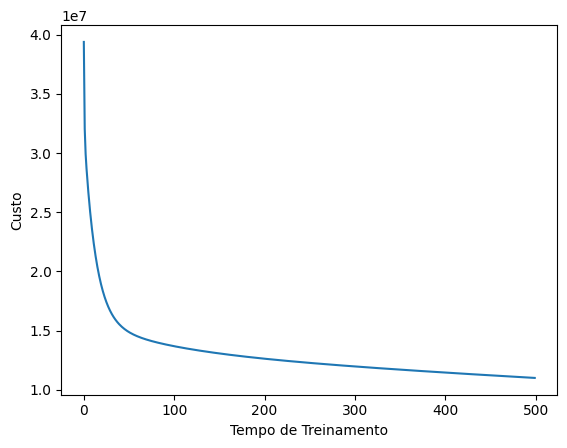

In [137]:
plt.ylabel("Custo") #nome do eixo y
plt.xlabel("Tempo de Treinamento") #nome do deixo x
plt.plot(historico_J)

<h5>Outras curvas de aprendizado</h5>

Analisar uma curva de convergência é útil para saber se nosso modelo ao menos está conseguindo melhorar a medida que treina, porém ainda nos diz muito pouco sobre a performance do nosso modelo no mundo real.

Em geral, é útil plotarmos em conjunto curvas que mostrem o erro do modelo no conjunto de treino e no conjunto de validação ou teste. Comparando essas curvas, podemos chegar a diversas conclusões. Abaixo alguns exemplos:

- Se ambas curvas diminuem ao longo do tempo e tendem a se aproximar, então temos um bom modelo.
- Se o erro do conjunto de treinamento diminui, porém o erro do conjunto de teste não modifica, isto pode indicar que estamos tendo **overfitting**, nosso modelo está se ajustando em demasia aos dados de treino e não está generalizando bem.
- Se ambas curvas estão diminuindo ao final do gráfico, isto pode ser sinal de que paramos o treinamento muito cedo e o modelo pode melhorar.
- Se a curva de validação tem erro menor do que a curva do conjunto de treino, isto pode indicar que de que o conjunto de validação é muito mais fácil do que o conjunto de treino.






<h2>Tarefa de Avaliação de Modelos</h2>

Altere a função do gradiente descendente para que além de armazenar o histórico do valor da função de custo, também armazene o valores parciais dos parâmetros $\vec{w}$ e $b$ nas variáveis ***historico_W*** (uma lista de vetores de **w**) e ***historico_b*** (uma lista de valores escalares). Com isto, poderemos calcular o valor da função de custo também para os nossos dados de teste.



Depois que a função do gradiente descendente for atualizada, podemos realizar o treinamento mais uma vez para coletar estes dados.

In [138]:
W, b, historico_J, historico_W, historico_b = gradiente_descendente(X_treino, Y_treino, W_inicial, b, learning_rate, epocas)

ValueError: not enough values to unpack (expected 5, got 3)

Agora que temos o histórico de valores parciais de $\vec{w}$ e $b$ durante as diferentes iterações, podemos calcular o erro para os dois datasets.

In [ ]:
custo_conjunto_teste = []
for epoca in range(len(historico_J)):
    w_treino_parcial = historico_w[i]
    b_treino_parcial = historico_b[i]
    custo_conjunto_teste.append(funcao_custo(X_teste, Y_teste,w_treino_parcial,b_treino_parcial))

Finalmente, podemos plotar em conjunto as curvas de aprendizado no conjunto de treinamento e no conjunto de testes.

In [ ]:
plt.ylabel("Custo") #nome do eixo y
plt.xlabel("Tempo de Treinamento") #nome do deixo x
plt.plot(historico_J,label='Curva de treino')
plt.plot(custo_conjunto_teste,label='Curva de teste')

Abaixo, realize testes com pelo menos outros dois valores de divisão de dataset (que não seja 75% de treino e 25% de teste), realize novamente o treinamento e calcule novamente o erro para o conjunto de teste e faça plots comparando as curvas de treinamento e de teste.